In [2]:
from transformers import AutoProcessor, InstructBlipProcessor

In [3]:
llama_processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")
blip2_processor = AutoProcessor.from_pretrained("Salesforce/blip2-flan-t5-xl")
instructblip_processor = InstructBlipProcessor.from_pretrained("Salesforce/instructblip-vicuna-7b")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [21]:
def get_target_size(processor):
    if hasattr(processor, 'image_processor'):
        config = processor.image_processor
        print(config)
        print("Processor has image_processor")
    else:
        config = processor
        print("Processor does not have image_processor")
        
    if hasattr(config, 'crop_size'):
        print("Processor has crop_size")
        return config.crop_size['height'], config.crop_size['width']
    elif hasattr(config, 'size'):
        if isinstance(config.size, dict):
            print("Processor has size dict")
            return config.size['height'], config.size['width']
        print("Processor has size int")
        return config.size, config.size

In [22]:
get_target_size(llama_processor)

CLIPImageProcessor {
  "crop_size": {
    "height": 336,
    "width": 336
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "LlavaProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 336
  }
}

Processor has image_processor
Processor has crop_size


(336, 336)

In [23]:
get_target_size(blip2_processor)

BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "Blip2Processor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

Processor has image_processor
Processor has size dict


(224, 224)

In [24]:
get_target_size(instructblip_processor)

BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "InstructBlipProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

Processor has image_processor
Processor has size dict


(224, 224)

In [ ]:
from transformers import LlavaForConditionalGeneration

model = LlavaForConditionalGeneration.from_pretrained(
                "llava-hf/llava-1.5-7b-hf",
                device_map="cpu"
            )

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Loading checkpoint shards: 100%|██████████| 3/3 [00:45<00:00, 15.00s/it]


AttributeError: 'LlavaForConditionalGeneration' object has no attribute 'vision_model'

In [11]:
print(model.vision_tower.vision_model.config)

CLIPVisionConfig {
  "attention_dropout": 0.0,
  "dtype": "float32",
  "hidden_act": "quick_gelu",
  "hidden_size": 1024,
  "image_size": 336,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "model_type": "clip_vision_model",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 14,
  "projection_dim": 768,
  "transformers_version": "4.57.1",
  "vocab_size": 32000
}



In [35]:
from transformers import AutoModelForVision2Seq

model = AutoModelForVision2Seq.from_pretrained(
                "Salesforce/blip2-flan-t5-xl",
                device_map="auto"
            )
print(model.vision_model.config)

/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/site-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
python(36927) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/site-packages/accelerate/utils/modeling.py:1598: UserWarning: The following device_map keys do not match any submodules in the model: ['query_tokens', 'language_model.decoder.embed_tokens', 'language_model.encoder.embed_tokens']
  warnings.warn(
Some parameters are on the meta device because they were offloaded to the disk.


Blip2VisionConfig {
  "attention_dropout": 0.0,
  "dropout": 0.0,
  "dtype": "float32",
  "hidden_act": "gelu",
  "hidden_size": 1408,
  "image_size": 224,
  "initializer_factor": 1.0,
  "initializer_range": 1e-10,
  "intermediate_size": 6144,
  "layer_norm_eps": 1e-06,
  "model_type": "blip_2_vision_model",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 39,
  "patch_size": 14,
  "projection_dim": 512,
  "qkv_bias": true,
  "transformers_version": "4.57.1"
}



In [13]:
from transformers import InstructBlipForConditionalGeneration

model = InstructBlipForConditionalGeneration.from_pretrained(
                "Salesforce/instructblip-vicuna-7b",
                device_map="auto"
            )
print(model.vision_model.config)

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 4/4 [00:10<00:00,  2.53s/it]
/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/site-packages/accelerate/utils/modeling.py:1598: UserWarning: The following device_map keys do not match any submodules in the model: ['query_tokens']
  warnings.warn(
Some parameters are on the meta device because they were offloaded to the disk.


InstructBlipVisionConfig {
  "attention_dropout": 0.0,
  "dtype": "float32",
  "hidden_act": "gelu",
  "hidden_size": 1408,
  "image_size": 224,
  "initializer_range": 1e-10,
  "intermediate_size": 6144,
  "layer_norm_eps": 1e-06,
  "model_type": "instructblip_vision_model",
  "num_attention_heads": 16,
  "num_hidden_layers": 39,
  "patch_size": 14,
  "qkv_bias": true,
  "transformers_version": "4.57.1"
}



In [20]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("llava-hf/llava-1.5-7b-hf")
print(config.vision_config)


CLIPVisionConfig {
  "attention_dropout": 0.0,
  "hidden_act": "quick_gelu",
  "hidden_size": 1024,
  "image_size": 336,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "model_type": "clip_vision_model",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 14,
  "projection_dim": 768,
  "transformers_version": "4.57.1",
  "vocab_size": 32000
}



In [1]:
import torch

def get_adjacency_matrix(attention_matrix, input_tokens):
    n_layers, length, _ = attention_matrix.shape
    N = (n_layers + 1) * length
    adjacency_matrix = torch.zeros((N, N), device=attention_matrix.device, dtype=torch.float32)
    labels_to_index = {str(k) + "_" + input_tokens[k]: k for k in range(length)}
    for i in range(1, n_layers + 1):
        for k_f in range(length):
            index_from = i * length + k_f
            label_from = f"L{i}_{k_f}"
            labels_to_index[label_from] = index_from
            adjacency_matrix[index_from, (i-1) * length : i * length] = attention_matrix[i-1, k_f]
    return adjacency_matrix, labels_to_index

def differentiable_max_flow(capacity, source, sink, iters=200, lr=1.0, penalty=500.0, device=None):
    device = device or capacity.device
    N = capacity.shape[0]
    x = torch.zeros((N, N), device=device, dtype=capacity.dtype, requires_grad=True)
    for _ in range(iters):
        f = capacity * torch.sigmoid(x)
        flow_in = f.sum(dim=0)
        flow_out = f.sum(dim=1)
        idx = torch.arange(N, device=device)
        internal_mask = (idx != source) & (idx != sink)
        violation = (flow_in - flow_out)[internal_mask]
        cons_loss = (violation ** 2).sum()
        flow_from_source = flow_out[source] - flow_in[source]
        flow_to_sink = flow_in[sink] - flow_out[sink]
        flow_value = 0.5 * (flow_from_source + flow_to_sink)
        objective = flow_value - penalty * cons_loss # maximize
        grads = torch.autograd.grad(objective, x, create_graph=True)[0]
        with torch.no_grad():
            x += lr * grads
        x.requires_grad_(True)
    
    f_final = capacity * torch.sigmoid(x)
    flow_in = f_final.sum(dim=0)
    flow_out = f_final.sum(dim=1)
    flow_value = 0.5 * ((flow_out[source] - flow_in[source]) + (flow_in[sink] - flow_out[sink]))
    return flow_value, f_final

def get_flow_relevance_torch(attentions, input_tokens, layer, iters, lr, penalty, head_fusion='mean', device=None):
    device = device or attentions.device
    attention_matrix = torch.cat(attentions, dim=0)
    
    if head_fusion == 'mean':
        attention_matrix = torch.mean(attention_matrix, dim=1)
    elif head_fusion == 'max':
        attention_matrix = torch.max(attention_matrix, dim=1)[0]
    elif head_fusion == 'min':
        attention_matrix = torch.min(attention_matrix, dim=1)[0]
    else:
        raise ValueError(f"Unknown head fusion method: {head_fusion}")

    n_layers, length, _ = attention_matrix.shape
    attention_matrix += torch.eye(length, device=attention_matrix.device)[None,...]
    attention_matrix = attention_matrix / (attention_matrix.sum(dim=-1, keepdim=True) + 1e-9)

    adjacency_matrix, labels_to_index = get_adjacency_matrix(attention_matrix, input_tokens)
    adjacency_matrix = adjacency_matrix.to(device)
    N = adjacency_matrix.shape[0]
    capacity = adjacency_matrix
    output_nodes = []
    input_nodes = []
    for key, idx in labels_to_index.items():
        if key.startswith("L" + str(layer + 1) + "_"):
            output_nodes.append(key)
        if idx < length:
            input_nodes.append(key)
    
    flow_values = torch.zeros((N, N), device=device, dtype=capacity.dtype)
    for out_key in output_nodes:
        u = labels_to_index[out_key]
        for in_key in input_nodes:
            v = labels_to_index[in_key]
            if u == v:
                continue
            flow_val, _f_mat = differentiable_max_flow(capacity, u, v, iters, lr, penalty, device)
            flow_values[u, v] = flow_val
        flow_values[u] /= flow_values[u].sum() + 1e-9
    
    start = (layer + 1) * length
    end = (layer + 2) * length
    prev_start = (layer) * length
    final_layer_attention_raw = flow_values[start:end, prev_start:start]
    relevance_attention_raw, _ = torch.max(final_layer_attention_raw, dim=0)
    return relevance_attention_raw, final_layer_attention_raw, labels_to_index

def attention_flow_loss(attentions, roi_patches, all_patches, layer=-1, head_fusion='mean', iters=120, lr=0.8, penalty=400.0, device=None):
    device = device or torch.device("cpu")
    patch_h, patch_w = all_patches
    n_layers = len(attentions)
    batch, n_heads, length, _ = attentions[0].shape
    if layer < 0:
        layer_idx = n_layers -1
    else:
        layer_idx = layer
    total_loss = torch.tensor(0.0, device=device, dtype=attentions[0].dtype)
    input_tokens = ["CLS"] + [f"P{i}" for i in range(length - 1)]
    relevance, _, _ = get_flow_relevance_torch(attentions, input_tokens, layer_idx, iters, lr, penalty, head_fusion, device)
    for (r, c) in roi_patches:
        roi_token_idx = 1 + r * patch_w + c
        if roi_token_idx < length:
            total_loss += relevance[roi_token_idx]
    return total_loss

In [29]:
import torch
import torch.nn.functional as F

EPS = 1e-9

def attention_flow_dp(att_list, head_fusion='mean', source_indices=None):
    """
    Compute attention-flow relevance at input tokens using max-min DP (widest path).
    att_list: list length n_layers, each element tensor (batch, n_heads, L, L)
              (batch supported; per-element batch must be same)
    head_fusion: 'mean'|'max'|'min'
    source_indices: list of indices in top layer that are sources (default [0] for CLS)
    Returns:
      flows: tensor (batch, L) with final relevance per input token (layer 0)
      final_layer_flow_matrices: list (per example) of the final-layer flow matrix
                               shape (batch, L_source, L_target) where source=layer+1, target=layer
    Notes:
      - A[l] maps tokens in layer l+1 -> tokens in layer l, shape (L, L)
      - We automatically add identity and row-normalize each A[l] to match the paper/code.
    """
    if not isinstance(att_list, list):
        raise ValueError("att_list must be a list of per-layer tensors (batch, n_heads, L, L).")

    n_layers = len(att_list)
    batch, n_heads, L, _ = att_list[0].shape
    device = att_list[0].device
    dtype = att_list[0].dtype

    # fuse heads per-layer and drop batch dim for per-example handling below
    A = []
    for l in range(n_layers):
        per_layer = att_list[l]  # (batch, n_heads, L, L)
        # Expect batch x n_heads x L x L — we'll fuse heads but keep batch for vectorization later
        if head_fusion == 'mean':
            fused = per_layer.mean(dim=1)   # (batch, L, L)
        elif head_fusion == 'max':
            fused = per_layer.max(dim=1)[0]
        elif head_fusion == 'min':
            fused = per_layer.min(dim=1)[0]
        else:
            raise ValueError("head_fusion must be 'mean'|'max'|'min'")

        # Add identity and row-normalize per example
        eye = torch.eye(L, device=device, dtype=dtype)[None, ...]  # (1, L, L)
        fused = fused + eye
        fused = fused / (fused.sum(dim=-1, keepdim=True) + EPS)  # (batch, L, L)
        A.append(fused)

    # Default source = CLS (index 0 at the top layer)
    if source_indices is None:
        source_indices = [0]

    # We'll compute per-example DP (batch small; typically 1). Vectorize across batch where convenient.
    flows = torch.zeros((batch, L), device=device, dtype=dtype)
    final_layer_flow_matrices = torch.zeros((batch, L, L), device=device, dtype=dtype)  # (batch, L_source, L_target)
    # Note: final_layer_flow_matrices corresponds to flows from layer_idx+1 -> layer_idx if layer_idx = n_layers-1 (last)
    # To match your previous API we'll fill it for the topmost selected layer; for generalization user can change.

    # For each example in batch
    for b in range(batch):
        # Build per-layer A_b[l] shape (L, L)
        A_b = [A_l[b] for A_l in A]  # list length n_layers of (L, L)

        # We'll record F_l for each layer index l (where F_l refers to activations at layer l+1 tokens)
        # Start at top (layer index = n_layers -> corresponds to tokens in topmost layer)
        # F_top is a vector shape (L,) with 1.0 at source_indices, 0 elsewhere
        F_by_layer = [None] * (n_layers + 1)
        F_top = torch.zeros((L,), device=device, dtype=dtype)
        F_top[source_indices] = 1.0
        F_by_layer[n_layers] = F_top  # F_{n_layers}

        # Propagate downward: for l from n_layers-1 down to 0 compute F_l
        # where F_l[j] = max_i min(F_{l+1}[i], A_l[i, j])
        for l in reversed(range(n_layers)):
            # F_by_layer[l+1] has shape (L,)
            F_next = F_by_layer[l+1]  # shape (L,)
            # A_b[l] shape (L, L) where rows = i in layer l+1, cols = j in layer l
            # compute min(F_next[i], A[i,j]) for each i,j -> shape (L, L) then max over i for each j
            # Use broadcasting: F_next[:, None] vs A_b[l]
            min_mat = torch.minimum(F_next[:, None], A_b[l])  # (L, L)
            F_curr = torch.max(min_mat, dim=0).values        # (L,)
            F_by_layer[l] = F_curr

        # The final relevance at input tokens is F_by_layer[0]
        flows[b] = F_by_layer[0]

        # Also compute the "final_layer_flow_matrix" between layer_idx+1 (=n_layers)?? and layer_idx
        # Usually we want the matrix between layer (layer_idx+1) and layer_idx. For default layer_idx = n_layers-1:
        # that's A_b[n_layers-1] with row-wise caps by F_by_layer[n_layers] (the source strengths).
        # Compute final_layer_flow = min(F_{layer+1}[i], A[layer][i,j]) with layer = n_layers-1
        final_layer_matrix = torch.minimum(F_by_layer[n_layers][:, None], A_b[n_layers - 1])  # (L_source, L_target)
        final_layer_flow_matrices[b] = final_layer_matrix

    return flows, final_layer_flow_matrices

# ------------------------------------------------------------------
# Utility wrapper that mirrors your prior get_flow_relevance_torch signature
# ------------------------------------------------------------------
def get_flow_relevance_torch(attentions, input_tokens, layer, iters=None, lr=None, penalty=None,
                             head_fusion='mean', source_indices=None, device=None):
    """
    attention list input shape: list len n_layers, each tensor (batch, n_heads, L, L)
    This function returns:
      - relevance_attention_raw: (batch, L) tensor (per-input-token relevance)
      - final_layer_attention_raw: (batch, L_source, L_target) matrix for the chosen layer
      - labels_to_index: mapping label->index (same as adjacency builder)
    Notes:
      - The arguments iters/lr/penalty are accepted for API compatibility but not used (DP is exact).
      - 'layer' chooses which block to extract as final_layer_attention_raw:
          final block is rows = nodes in (layer+1), cols = nodes in (layer)
      - source_indices default to [0] (CLS) in top layer.
    """
    device = device or attentions[0].device
    n_layers = len(attentions)
    batch, n_heads, L, _ = attentions[0].shape

    if layer < 0:
        layer_idx = n_layers - 1
    else:
        layer_idx = layer
    # build input token labels for bookkeeping (CLS + patches)
    labels_to_index = {}
    for k in range(L):
        labels_to_index[str(k) + "_" + f"T{k}"] = k
    # fill layer labels
    for i in range(1, n_layers + 1):
        for k in range(L):
            labels_to_index[f"L{i}_{k}"] = i * L + k

    # run DP (the function handles batch)
    flows_batch, final_layer_flow_matrices = attention_flow_dp(attentions, head_fusion=head_fusion, source_indices=source_indices)

    # Extract final_layer_attention_raw for the requested layer:
    # final-layer block rows: (layer+1)*L : (layer+2)*L  (in adjacency indexing)
    # but our final_layer_flow_matrices is computed for the top layer (n_layers-1). If user requested a different layer,
    # we can compute the general final-layer matrix by re-running DP and capturing arrays per layer.
    # For simplicity (and common use), we assume layer_idx is the last layer (n_layers-1).
    # If layer_idx != n_layers-1 we compute the matrix specifically:
    if layer_idx == n_layers - 1:
        # final_layer_flow_matrices already correspond to layer_idx = n_layers-1
        final_layer_attention_raw = final_layer_flow_matrices  # (batch, L_source, L_target)
    else:
        # compute final_layer matrix specifically: need F_{layer+1} and A[layer]
        # We'll perform a per-example DP but capture F_by_layer[layer+1] and A[layer]
        batch_final_mats = torch.zeros((batch, L, L), device=device, dtype=attentions[0].dtype)
        # build fused A per layer first (like in attention_flow_dp)
        A = []
        for l in range(n_layers):
            per_layer = attentions[l]
            if head_fusion == 'mean':
                fused = per_layer.mean(dim=1)   # (batch, L, L)
            elif head_fusion == 'max':
                fused = per_layer.max(dim=1)[0]
            elif head_fusion == 'min':
                fused = per_layer.min(dim=1)[0]
            else:
                raise ValueError("head_fusion must be 'mean'|'max'|'min'")
            eye = torch.eye(L, device=device, dtype=fused.dtype)[None, ...]
            fused = fused + eye
            fused = fused / (fused.sum(dim=-1, keepdim=True) + EPS)
            A.append(fused)

        for b in range(batch):
            # DP per-example
            F_by_layer = [None] * (n_layers + 1)
            F_top = torch.zeros((L,), device=device, dtype=attentions[0].dtype)
            if source_indices is None:
                sidx = [0]
            else:
                sidx = source_indices
            F_top[sidx] = 1.0
            F_by_layer[n_layers] = F_top
            for l in reversed(range(n_layers)):
                F_next = F_by_layer[l+1]
                A_b_l = A[l][b]
                min_mat = torch.minimum(F_next[:, None], A_b_l)
                F_curr = torch.max(min_mat, dim=0).values
                F_by_layer[l] = F_curr
            # final-layer matrix between layer_idx+1 and layer_idx:
            src_strengths = F_by_layer[layer_idx + 1]  # (L,)
            A_block = A[layer_idx][b]                  # (L, L)
            block = torch.minimum(src_strengths[:, None], A_block)  # (L_source, L_target)
            batch_final_mats[b] = block
        final_layer_attention_raw = batch_final_mats
    relevance_attention_raw = flows_batch  # (batch, L)

    return relevance_attention_raw, final_layer_attention_raw, labels_to_index

# ------------------------------------------------------------------
# Top-level loss that matches your requested call signature
# ------------------------------------------------------------------
def attention_flow_loss(attentions, roi_patches, all_patches, layer=-1, head_fusion='mean',
                        source_indices=None, device=None):
    """
    attentions: list len n_layers, each tensor (batch, n_heads, L, L)
    roi_patches: list of (r,c) tuples (same for all examples). If per-example, wrap accordingly.
    all_patches: (patch_h, patch_w)
    layer: which layer index to use for final block (default -1 => last)
    head_fusion: 'mean'|'max'|'min'
    source_indices: list of source indices in top layer (default [0] CLS)
    Returns:
      total_loss: scalar tensor (sum of flow relevance for ROI patches across batch)
    """
    if not isinstance(attentions, list):
        raise ValueError("attentions must be a list of per-layer tensors (batch, n_heads, L, L)")

    device = device or attentions[0].device
    n_layers = len(attentions)
    batch, n_heads, L, _ = attentions[0].shape
    if layer < 0:
        layer_idx = n_layers - 1
    else:
        layer_idx = layer

    patch_h, patch_w = all_patches
    # build simple input_tokens list for labels (not strictly needed)
    input_tokens = ["CLS"] + [f"P{i}" for i in range(L - 1)]

    relevance_batch, _, labels_to_index = get_flow_relevance_torch(attentions, input_tokens, layer_idx,
                                                                   iters=None, lr=None, penalty=None,
                                                                   head_fusion=head_fusion,
                                                                   source_indices=source_indices,
                                                                   device=device)
    # relevance_batch shape (batch, L) where index 0 is CLS, indexes 1.. are patches
    total_loss = torch.tensor(0.0, device=device, dtype=relevance_batch.dtype)
    for b in range(batch):
        for (r, c) in roi_patches:
            roi_token_idx = 1 + r * patch_w + c
            if roi_token_idx < L:
                total_loss = total_loss + relevance_batch[b, roi_token_idx]
    return total_loss

In [31]:
def fuse_heads(attn, mode='mean'):
    # attn: [1, H, L, L]
    if mode == "mean":
        return attn.mean(dim=1)                      # [1, L, L]
    elif mode == "max":
        return attn.max(dim=1)[0]
    elif mode == "min":
        return attn.min(dim=1)[0]
    else:
        raise ValueError("Invalid head fusion")


def soft_maxmin_matmul(F_prev, A, temp=0.1):
    """
    Differentiable approximation of:
        F_next[i,j] = max_k min(F_prev[i,k], A[k,j])

    Equivalent to:
        log(F_next) = logsumexp_k( min(log(F_prev), log(A)) / temp )
    """
    # F_prev, A: [L, L]
    log_F = F_prev.clamp(min=1e-12).log()   # [L, L]
    log_A = A.clamp(min=1e-12).log()        # [L, L]

    # combine: broadcasting → [L, L, L]
    # min(logF[i,k], logA[k,j])
    min_log = torch.minimum(log_F.unsqueeze(2), log_A.unsqueeze(0))   # [L, L, L]

    # softmax over k (dim=1)
    F_next = (temp * torch.logsumexp(min_log / temp, dim=1)).exp()   # [L, L]
    return F_next


def attention_flow(attentions, start_layer, head_fusion='mean'):
    """
    attentions: list of [1, H, L, L]
    start_layer: compute flow starting from this layer
    """
    n_layers = len(attentions)
    L = attentions[0].shape[-1]

    # Build list of fused attn per layer
    A = []
    for t in attentions:
        A.append(fuse_heads(t, head_fusion)[0])   # [L, L]

    # Add identity (residual)
    A = [a + torch.eye(L, device=a.device) for a in A]
    A = [a / a.sum(dim=-1, keepdim=True) for a in A]

    # Initialize flow at layer "start_layer"
    # Flow from each token to each token at that layer = identity
    F = torch.eye(L, device=A[0].device)

    # Propagate flow to the final layer
    for layer in range(start_layer, n_layers):
        F = soft_maxmin_matmul(F, A[layer])   # Max-min composition

    return F     # [L, L]


def attn_agg_fn(attentions, roi_patches, all_patches, num_layers=-1, head_fusion='mean'):
    """
    Computes differentiable ATTENTION FLOW to ROI patches.
    """
    batch, heads, L, _ = attentions[0].shape
    assert batch == 1

    patch_h, patch_w = all_patches

    # layer index: negative means final layer
    if num_layers < 0:
        start_layer = len(attentions) - 1
    else:
        start_layer = num_layers

    # Compute flow matrix F[start_layer → final_layer]
    F = attention_flow(attentions, start_layer, head_fusion)  # [L, L]

    # CLS = 0
    loss = 0.0
    for (r, c) in roi_patches:
        roi_idx = 1 + r * patch_w + c
        if roi_idx < L:
            loss = loss + F[0, roi_idx]

    return loss

In [23]:
def fuse_heads_and_normalize(att_list, head_fusion='mean'):
    if not isinstance(att_list, list):
        raise ValueError("att_list must be a list of per-layer tensors (batch, n_heads, L, L)")
    n_layers = len(att_list)
    batch, n_heads, L, _ = att_list[0].shape
    device, dtype = att_list[0].device, att_list[0].dtype
    fused_list = []
    eye = torch.eye(L, device=device, dtype=dtype)[None, ...]
    for layer_tensor in att_list:
        if head_fusion == 'mean':
            fused = layer_tensor.mean(dim=1)
        elif head_fusion == 'max':
            fused = layer_tensor.max(dim=1)[0]
        elif head_fusion == 'min':
            fused = layer_tensor.min(dim=1)[0]
        else:
            raise ValueError("head_fusion must be 'mean' or 'max' or 'min'")
        fused += eye
        fused /= (fused.sum(dim=-1, keepdim=True) + EPS)
        fused_list.append(fused)
    return fused_list

def _compute_dp_for_example(A_per_layer, source_indices):
    n_layers = len(A_per_layer)
    L = A_per_layer[0].shape[0]
    F_by_layer = [None] * (n_layers + 1)
    device, dtype = A_per_layer[0].device, A_per_layer[0].dtype
    F_top = torch.zeros((L,), device=device, dtype=dtype)
    F_top[source_indices] = 1.0
    F_by_layer[n_layers] = F_top
    for l in reversed(range(n_layers)):
        F_next = F_by_layer[l+1]
        A_l = A_per_layer[l]
        min_mat = torch.minimum(F_next[:, None], A_l)
        F_curr = torch.max(min_mat, dim=0).values
        F_by_layer[l] = F_curr
    return F_by_layer

def attention_flow_dp(att_list, head_fusion='mean', source_indices=None, return_intermediate=False):
    fused = fuse_heads_and_normalize(att_list, head_fusion)
    n_layers = len(fused)
    batch, L, _ = fused[0].shape
    device, dtype = fused[0].device, fused[0].dtype
    if source_indices is None:
        source_indices = [0]
    flows = torch.zeros((batch, L), device=device, dtype=dtype)
    final_layer_flow_matrices = torch.zeros((batch, L, L), device=device, dtype=dtype)
    intermediates = [] if return_intermediate else None
    for b in range(batch):
        A_b = [fused_l[b] for fused_l in fused]
        F_by_layer = _compute_dp_for_example(A_b, source_indices)
        flows[b] = F_by_layer[0]
        final_layer_flow_matrices[b] = torch.minimum(F_by_layer[n_layers][:, None], A_b[n_layers-1])
        if return_intermediate:
            intermediates.append(F_by_layer)
    
    if return_intermediate:
        return flows, final_layer_flow_matrices, intermediates
    return flows, final_layer_flow_matrices

def get_flow_relevance_torch(attentions, input_tokens, layer, head_fusion='mean', source_indices=None, device=None):
    device = device or attentions[0].device
    n_layers = len(attentions)
    batch, n_heads, L, _ = attentions[0].shape
    if layer < 0:
        layer_idx = n_layers - 1
    else:
        layer_idx = layer

    labels_to_index = {f"{k}_{input_tokens[k]}": k for k in range(L)}
    for i in range(1, n_layers + 1):
        for k in range(L):
            labels_to_index[f"L{i}_{k}"] = i * L + k
    flows, final_layer_mats, intermediates = attention_flow_dp(attentions, head_fusion, source_indices, return_intermediate=True)
    
    if layer_idx == n_layers - 1:
        final_block = final_layer_mats
    else:
        fused = fuse_heads_and_normalize(attentions, head_fusion)
        batch_final = torch.zeros((batch, L, L), device=device, dtype=attentions[0].dtype)
        for b in range(batch):
            F_by_layer = intermediates[b]
            A_block = fused[layer_idx][b]
            src_strengths = F_by_layer[layer_idx + 1]
            batch_final[b] = torch.minimum(src_strengths[:, None], A_block)
        final_block = batch_final
    
    relevance_attention_raw = flows
    final_layer_attention_raw = final_block
    return relevance_attention_raw, final_layer_attention_raw, labels_to_index

def attention_flow_loss(attentions, roi_patches, all_patches, num_layers=-1, head_fusion='mean', source_indices=None, device=None):
    device = device or attentions[0].device
    patch_h, patch_w = all_patches
    n_layers = len(attentions)
    batch, n_heads, L, _ = attentions[0].shape
    layer_idx = n_layers - 1 if num_layers < 0 else num_layers
    input_tokens = ["CLS"] + [f"P{i}" for i in range(L - 1)]
    relevance_batch, _, _ = get_flow_relevance_torch(attentions, input_tokens, layer_idx, head_fusion, source_indices, device)
    total_loss = torch.tensor(0.0, device=device, dtype=relevance_batch.dtype)
    for b in range(batch):
        for (r, c) in roi_patches:
            roi_token_idx = 1 + r * patch_w + c
            if roi_token_idx < L:
                total_loss += relevance_batch[b, roi_token_idx]
    return total_loss

In [ ]:
import torch

EPS = 1e-9


def fuse_heads_and_normalize_tensor(attentions_tensor, head_fusion='mean'):
    """
    attentions_tensor: (n_layers, batch, n_heads, L, L)
    returns: A tensor of shape (n_layers, batch, L, L) where each layer is fused and row-normalized.
    """
    n_layers, batch, n_heads, L, _ = attentions_tensor.shape
    device, dtype = attentions_tensor.device, attentions_tensor.dtype
    eye = torch.eye(L, device=device, dtype=dtype)[None, None, ...]  # (1,1,L,L) for broadcasting

    if head_fusion == 'mean':
        fused = attentions_tensor.mean(dim=2)   # (n_layers, batch, L, L)
    elif head_fusion == 'max':
        fused = attentions_tensor.max(dim=2)[0]
    elif head_fusion == 'min':
        fused = attentions_tensor.min(dim=2)[0]
    else:
        raise ValueError("head_fusion must be 'mean' | 'max' | 'min'")

    fused = fused + eye  # add identity (broadcasts over n_layers and batch)
    fused = fused / (fused.sum(dim=-1, keepdim=True) + EPS)
    return fused  # (n_layers, batch, L, L)


def _compute_dp_for_single_example(A_per_layer, source_indices):
    """
    A_per_layer: tensor (n_layers, L, L) for a single example
    source_indices: list of ints (indices in top layer used as sources)
    Returns:
      F_by_layer: list length n_layers+1, each element tensor (L,)
                 (F_by_layer[n_layers] = source strengths; F_by_layer[0] = input relevance)
    """
    n_layers, L, _ = A_per_layer.shape
    device, dtype = A_per_layer.device, A_per_layer.dtype

    F_by_layer = [None] * (n_layers + 1)
    F_top = torch.zeros((L,), device=device, dtype=dtype)
    F_top[source_indices] = 1.0
    F_by_layer[n_layers] = F_top

    for l in reversed(range(n_layers)):
        F_next = F_by_layer[l + 1]        # (L,)
        A_l = A_per_layer[l]              # (L, L) rows: src in layer l+1, cols: tgt in layer l
        min_mat = torch.minimum(F_next[:, None], A_l)  # (L, L)
        F_curr = min_mat.max(dim=0).values             # (L,)
        F_by_layer[l] = F_curr

    return F_by_layer


def get_flow_relevance_torch(attentions, input_tokens, layer, head_fusion='mean',
                             source_indices=None, device=None):
    """
    attentions: list or tensor of shape (n_layers, batch, n_heads, L, L)
                (function expects batch == 1)
    input_tokens: list of token labels length L (used to build labels_to_index)
    layer: selected layer index (0-based); if negative, caller should supply proper index beforehand.
    Returns:
      relevance_attention_raw: tensor (L,) relevance per input token (layer 0)
      final_layer_attention_raw: tensor (L_source, L_target) for requested layer (single example)
      labels_to_index: dict mapping label->index consistent with adjacency indexing
    """
    device = device or attentions.device
    # Convert input to tensor if list provided
    if isinstance(attentions, list):
        # stack into tensor (n_layers, batch, n_heads, L, L)
        attentions_tensor = torch.stack(attentions, dim=0).to(device)
    else:
        attentions_tensor = attentions.to(device)

    n_layers, batch, n_heads, L, _ = attentions_tensor.shape
    if batch != 1:
        raise ValueError("This function expects batch == 1 (strip batch before calling if needed).")

    if layer < 0:
        layer_idx = n_layers - 1
    else:
        layer_idx = layer

    # labels mapping (adjacency style)
    labels_to_index = {f"{k}_{input_tokens[k]}": k for k in range(L)}
    for i in range(1, n_layers + 1):
        for k in range(L):
            labels_to_index[f"L{i}_{k}"] = i * L + k

    # fuse heads and normalize -> (n_layers, batch, L, L)
    fused = fuse_heads_and_normalize_tensor(attentions_tensor, head_fusion=head_fusion)

    # drop batch dim (we asserted batch==1)
    A = fused[:, 0, :, :]  # (n_layers, L, L)

    if source_indices is None:
        source_indices = [0]

    # compute full DP (single example)
    F_by_layer = _compute_dp_for_single_example(A, source_indices)  # list length n_layers+1

    # relevance at input tokens:
    relevance_attention_raw = F_by_layer[0]  # (L,)

    # final-layer block for requested layer: rows = layer+1 tokens, cols = layer tokens
    src_strengths = F_by_layer[layer_idx + 1]     # (L,)
    A_block = A[layer_idx]                        # (L, L)
    final_layer_attention_raw = torch.minimum(src_strengths[:, None], A_block)  # (L_source, L_target)

    return relevance_attention_raw, final_layer_attention_raw, labels_to_index


def attention_flow_loss(attentions, roi_patches, all_patches, num_layers=-1,
                        head_fusion='mean', source_indices=None, device=None):
    """
    attentions: (n_layers, batch, n_heads, L, L)  (expects batch==1)
    roi_patches: list of (r,c) tuples
    all_patches: (patch_h, patch_w)
    num_layers: if <0 -> use last layer; else layer_idx = num_layers  (0-based)
    Returns:
      scalar loss (torch tensor) summing relevance at ROI patch tokens.
    """
    device = device or attentions[0].device

    # Prepare shapes and assert batch == 1
    if isinstance(attentions, list):
        attentions_tensor = torch.stack(attentions, dim=0).to(device)
    else:
        attentions_tensor = attentions.to(device)

    n_layers, batch, n_heads, L, _ = attentions_tensor.shape
    if batch != 1:
        raise ValueError("attention_flow_loss expects batch size 1 (per your request).")

    layer_idx = n_layers - 1 if num_layers < 0 else num_layers
    patch_h, patch_w = all_patches

    # Make token labels for adjacency mapping (not strictly required but preserved)
    input_tokens = ["CLS"] + [f"P{i}" for i in range(L - 1)]

    relevance, _, _ = get_flow_relevance_torch(attentions_tensor, input_tokens, layer_idx,
                                               head_fusion=head_fusion, source_indices=source_indices,
                                               device=device)

    total_loss = torch.tensor(0.0, device=device, dtype=relevance.dtype)
    for (r, c) in roi_patches:
        roi_token_idx = 1 + r * patch_w + c
        if roi_token_idx < L:
            total_loss = total_loss + relevance[roi_token_idx]

    return total_loss


In [32]:
batch = 1
n_layers = 4
n_heads = 8
patch_h = patch_w = 4
L = patch_h * patch_w + 1  # +1 for CLS token
device = torch.device("cpu")

# create dummy attentions list: len n_layers, each tensor (batch, n_heads, L, L)
attentions_list = [torch.rand(batch, n_heads, L, L, device=device) for _ in range(n_layers)]

# ROI patches (row, col) in patch grid
roi_patches = [(1, 2), (2, 1)]
all_patches = (patch_h, patch_w)

# compute loss
loss = attention_flow_loss(attentions_list, roi_patches, all_patches, layer=-1)
print("attention-flow loss:", loss.item())

attention-flow loss: 0.1439119279384613


In [34]:
loss = attention_flow_loss(attentions_list, roi_patches, all_patches, num_layers=-1)
print("attention-flow loss:", loss.item())

attention-flow loss: 0.1439119279384613


In [7]:
from transformers import LlavaForConditionalGeneration

model = LlavaForConditionalGeneration.from_pretrained(
    "llava-hf/llava-1.5-7b-hf",
    device_map="cpu"
)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
vision_model = model.vision_tower
# print(help(vision_model.vision_model.encoder))
print(model)
# print(vision_model.vision_model)

# for i, layer in enumerate(vision_model.vision_model.encoder.layers):
#     print(f"\n=== Layer {i} ===")
#     print(layer)

#     # Multi-head self-attention projections
#     attn = layer.self_attn
#     print("QKV proj:", attn.qkv_proj)
#     print("Out proj:", attn.out_proj)

#     # Feedforward network
#     mlp = layer.mlp
#     print("MLP fc1:", mlp.fc1)
#     print("MLP fc2:", mlp.fc2)


LlavaForConditionalGeneration(
  (model): LlavaModel(
    (vision_tower): CLIPVisionModel(
      (vision_model): CLIPVisionTransformer(
        (embeddings): CLIPVisionEmbeddings(
          (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
          (position_embedding): Embedding(577, 1024)
        )
        (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (encoder): CLIPEncoder(
          (layers): ModuleList(
            (0-23): 24 x CLIPEncoderLayer(
              (self_attn): CLIPAttention(
                (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
                (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
                (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
                (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
              )
              (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
       

In [ ]:
import torch
import torch.nn as nn
from einops import rearrange
import sys
sys.path.append('/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/Transformer-Explainability-main')
from modules.layers_ours import *
from baselines.ViT.helpers import load_pretrained
from baselines.ViT.weight_init import trunc_normal_
from baselines.ViT.layer_helpers import to_2tuple
from baselines.ViT.ViT_LRP import Mlp, PatchEmbed
from transformers import LlavaForConditionalGeneration
from transformers.modeling_outputs import BaseModelOutputWithPooling

def compute_rollout_attention(all_layer_matrices, start_layer=0):
    num_tokens = all_layer_matrices[0].shape[1]
    batch_size = all_layer_matrices[0].shape[0]
    eye = torch.eye(num_tokens).expand(batch_size, num_tokens, num_tokens).to(all_layer_matrices[0].device)
    all_layer_matrices = [all_layer_matrices[i] + eye for i in range(len(all_layer_matrices))]
    joint_attention = all_layer_matrices[start_layer]
    for i in range(start_layer+1, len(all_layer_matrices)):
        joint_attention = all_layer_matrices[i].bmm(joint_attention)
    return joint_attention

class Attention(nn.Module):
    def __init__(self, dim, num_heads=16, qkv_bias=False, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.k_proj = Linear(dim, dim, bias=qkv_bias)
        self.q_proj = Linear(dim, dim, bias=qkv_bias)
        self.v_proj = Linear(dim, dim, bias=qkv_bias)

        self.matmul_qk = einsum('bhid,bhjd->bhij')
        self.matmul_av = einsum('bhij,bhjd->bhid')

        self.attn_drop = Dropout(attn_drop)
        self.out_proj = Linear(dim, dim)
        self.proj_drop = Dropout(proj_drop)
        self.softmax = Softmax(dim=-1)

        self.attn_cam = None
        self.attn = None
        self.v = None
        self.v_cam = None
        self.attn_gradients = None
    
    def get_attn(self): return self.attn
    def set_attn(self, x): self.attn = x
    def get_attn_cam(self): return self.attn_cam
    def set_attn_cam(self, x): self.attn_cam = x
    def get_v(self): return self.v
    def set_v(self, x): self.v = x
    def get_v_cam(self): return self.v_cam
    def set_v_cam(self, x): self.v_cam = x
    def get_attn_gradients(self): return self.attn_gradients
    def set_attn_gradients(self, x): self.attn_gradients = x
    
    def forward(self, x):
        b, n, c = x.shape
        
        q = self.q_proj(x)
        k = self.k_proj(x)
        v = self.v_proj(x)
        q = rearrange(q, 'b n (h d) -> b h n d', h=self.num_heads)
        k = rearrange(k, 'b n (h d) -> b h n d', h=self.num_heads)
        v = rearrange(v, 'b n (h d) -> b h n d', h=self.num_heads)
        
        self.set_v(v)
        dots = self.matmul_qk([q, k]) * self.scale
        attn = self.softmax(dots)
        attn = self.attn_drop(attn)
        self.set_attn(attn)
        if attn.requires_grad:
            attn.retain_grad()
            # attn.register_hook(self.set_attn_gradients)
            attn.register_hook(lambda grad: setattr(self, "attn_gradients", grad))
        
        out = self.matmul_av([attn, v])
        out = rearrange(out, 'b h n d -> b n (h d)')
        out = self.out_proj(out)
        out = self.proj_drop(out)
        return out
    
    def relprop(self, cam, **kwargs):
        cam = self.proj_drop.relprop(cam, **kwargs)
        cam = self.out_proj.relprop(cam, **kwargs)

        cam = rearrange(cam, 'b n (h d) -> b h n d', h=self.num_heads)
        cam_attn, cam_v = self.matmul_av.relprop(cam, **kwargs)
        cam_attn /= 2
        cam_v /= 2
        self.set_attn_cam(cam_attn)
        self.set_v_cam(cam_v)

        cam_attn = self.attn_drop.relprop(cam_attn, **kwargs)
        cam_attn = self.softmax.relprop(cam_attn, **kwargs)
        cam_q, cam_k = self.matmul_qk.relprop(cam_attn, **kwargs)
        cam_q /= 2
        cam_k /= 2

        cam_q = rearrange(cam_q, 'b h n d -> b n (h d)')
        cam_k = rearrange(cam_k, 'b h n d -> b n (h d)')
        cam_v = rearrange(cam_v, 'b h n d -> b n (h d)')
        cam_q = self.q_proj.relprop(cam_q, **kwargs)
        cam_k = self.k_proj.relprop(cam_k, **kwargs)
        cam_v = self.v_proj.relprop(cam_v, **kwargs)

        cam = cam_q + cam_k + cam_v
        return cam

class Block(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=4., qkv_bias=False, drop=0., attn_drop=0.):
        super().__init__()
        self.norm1 = LayerNorm(dim, eps=1e-5)
        self.attn = Attention(dim, num_heads, qkv_bias, attn_drop, drop)
        self.norm2 = LayerNorm(dim, eps=1e-5)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, drop=drop)

        self.add1 = Add()
        self.add2 = Add()
        self.clone1 = Clone()
        self.clone2 = Clone()
    
    def forward(self, x):
        x1, x2 = self.clone1(x, 2)
        x = self.add1([x1, self.attn(self.norm1(x2))])
        x1, x2 = self.clone2(x, 2)
        x = self.add2([x1, self.mlp(self.norm2(x2))])
        return x
    
    def relprop(self, cam, **kwargs):
        cam1, cam2 = self.add2.relprop(cam, **kwargs)
        cam2 = self.mlp.relprop(cam2, **kwargs)
        cam2 = self.norm2.relprop(cam2, **kwargs)
        cam = self.clone2.relprop((cam1, cam2), **kwargs)
        cam1, cam2 = self.add1.relprop(cam, **kwargs)
        cam2 = self.attn.relprop(cam2, **kwargs)
        cam2 = self.norm1.relprop(cam2, **kwargs)
        cam = self.clone1.relprop((cam1, cam2), **kwargs)
        return cam

class VisionModel(nn.Module):
    def __init__(self, img_size=336, patch_size=14, in_channels=3, embed_dim=1024, depth=24, num_heads=16, mlp_ratio=4., qkv_bias=True, drop_rate=0., attn_drop_rate=0.):
        super().__init__()
        
        self.patch_embed = PatchEmbed(img_size, patch_size, in_channels, embed_dim)
        num_patches = self.patch_embed.num_patches
        self.pos_embed = nn.Embedding(num_patches + 1, embed_dim)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        trunc_normal_(self.cls_token, std=.02)

        self.pre_layernorm = LayerNorm(embed_dim, eps=1e-5)
        self.blocks = nn.ModuleList([
            Block(embed_dim, num_heads, mlp_ratio, qkv_bias, drop_rate, attn_drop_rate)
            for _ in range(depth)
        ])
        self.post_layernorm = LayerNorm(embed_dim, eps=1e-5)

        self.add = Add()
        self.inp_grad = None
        self.second_last_hidden = None
        self.last_hidden = None

    def get_inp_grad(self): return self.inp_grad
    def set_inp_grad(self, x): self.inp_grad = x

    @property
    def no_weight_decay(self):
        return {"pos_embed", "cls_token"}
    
    def forward(self, pixel_values, output_hidden_states=False, return_dict=True, output_attentions=False, interpolate_pos_encoding=False):
        x = pixel_values
        hidden_states = []
        B = x.shape[0]
        x = self.patch_embed(x)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        pos_ids = torch.arange(x.shape[1], device=x.device)
        x = self.add([x, self.pos_embed(pos_ids)])
        x = self.pre_layernorm(x)
        hidden_states.append(x)
        for block in self.blocks:
            x = block(x)
            if output_hidden_states:
                hidden_states.append(x)
        self.second_last_hidden = x
        if x.requires_grad:
            x.register_hook(self.set_inp_grad)
        x = self.post_layernorm(x)
        hidden_states.append(x)
        self.last_hidden = x
        pooled = x[:, 0]
        if return_dict:
            return BaseModelOutputWithPooling(
                last_hidden_state=self.last_hidden,
                pooler_output=pooled,
                hidden_states=tuple(hidden_states),
            )
        return self.last_hidden, pooled, hidden_states
    
    def relprop(self, cam, method="transformer_attribution", start_layer=0, **kwargs):
        cam = self.post_layernorm.relprop(cam, **kwargs)
        for block in reversed(self.blocks):
            cam = block.relprop(cam, **kwargs)
        cam = self.pre_layernorm.relprop(cam, **kwargs)
        
        if method == "full":
            cam, _ = self.add.relprop(cam, **kwargs)
            cam = cam[:, 1:]
            cam = self.patch_embed.relprop(cam, **kwargs)
            cam = cam.sum(dim=1)
            return cam
        
        elif method == "transformer_attribution":
            cams = []
            for block in self.blocks:
                grad = block.attn.get_attn_gradients()
                cam = block.attn.get_attn_cam()
                cam = cam[0].reshape(-1, cam.shape[-1], cam.shape[-1])
                grad = grad[0].reshape(-1, grad.shape[-1], grad.shape[-1])
                cam = grad * cam
                cam = cam.clamp(min=0).mean(dim=0)
                cams.append(cam.unsqueeze(0))
            rollout = compute_rollout_attention(cams, start_layer=start_layer)
            cam = rollout[:, 0, 1:]
            return cam

class VisionModelWithHead(nn.Module):
    def __init__(self, vm, num_classes=1000):
        super().__init__()
        self.vm = vm
        self.classifier = nn.Linear(1024, num_classes)
    
    def forward(self, x):
        outputs = self.vm(x)
        pooled = outputs.pooler_output
        logits = self.classifier(pooled)
        return logits

def remap_hf_to_custom(hf_sd):
    new_sd = {}
    for k, v in hf_sd.items():
        if k.startswith("embeddings.patch_embedding"):
            new_k = k.replace("embeddings.patch_embedding", "patch_embed.proj")
        elif k.startswith("embeddings.position_embedding"):
            new_k = k.replace("embeddings.position_embedding", "pos_embed")
        elif k.startswith("pre_layrnorm"):
            new_k = k.replace("pre_layrnorm", "pre_layernorm")
        elif k.startswith("post_layernorm"):
            new_k = k.replace("post_layernorm", "post_layernorm")
        elif k.startswith("encoder.layers"):
            new_k = (
                k.replace("encoder.layers", "blocks")
                .replace("self_attn", "attn")
                .replace("layer_norm1", "norm1")
                .replace("layer_norm2", "norm2")
                .replace("mlp.fc1", "mlp.fc1")
                .replace("mlp.fc2", "mlp.fc2")
            )
        else:
            continue
        new_sd[new_k] = v
    return new_sd

def get_llava_model_with_custom_vision(model_id="llava-hf/llava-1.5-7b-hf", device_map="cpu"):
    model = LlavaForConditionalGeneration.from_pretrained(
        model_id,
        device_map=device_map
    )

    vision_model = model.vision_tower.vision_model
    hf_sd = vision_model.state_dict()
    
    vm = VisionModel()
    
    mapped_sd = remap_hf_to_custom(hf_sd)
    missing, unexpected = vm.load_state_dict(mapped_sd, strict=False)
    
    if missing:
        print("Missing keys:", missing)
    if unexpected:
        print("Unexpected keys:", unexpected)
        
    return model, vm

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, vm = get_llava_model_with_custom_vision()
vm.requires_grad_(False)
for param in vm.parameters():
    param.requires_grad = False
vm_with_head = VisionModelWithHead(vm, num_classes=1000).to(device)
optim = torch.optim.Adam(vm_with_head.classifier.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Missing keys: ['cls_token']


In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_transforms = transforms.Compose([
    transforms.Resize(336, interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.CenterCrop(336),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.48145466, 0.4578275, 0.40821073],
        std=[0.26862954, 0.26130258, 0.27577711],
    ),
])
train_dataset = datasets.ImageFolder(root='/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/imagenet/ILSVRC2012_img_train', transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)

In [4]:
import scipy.io
meta = scipy.io.loadmat(
    '/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/imagenet/ILSVRC2012_devkit_t12/data/meta.mat'
)

synsets = meta['synsets']
wnid_to_imagenet = {}
for s in synsets[:1000]:
    imagenet_id = int(s[0][0][0][0])
    wnid = str(s[0][1][0])
    wnid_to_imagenet[wnid] = imagenet_id - 1

folder_to_idx = train_dataset.class_to_idx
num_classes = len(folder_to_idx)

idx_to_imagenet = torch.empty(num_classes, dtype=torch.long)

for wnid, folder_idx in folder_to_idx.items():
    idx_to_imagenet[folder_idx] = wnid_to_imagenet[wnid]

In [ ]:
from torch.utils.data import Dataset
import os
from PIL import Image

class ImagenetValDataset(Dataset):
    def __init__(self, val_dir, gt_txt, transform=None):
        self.val_dir = val_dir
        self.gt_txt = gt_txt
        self.transform = transform
        with open(gt_txt, "r") as f:
            self.labels = [int(x.strip()) - 1 for x in f.readlines()]
        self.images = sorted([
            fname for fname in os.listdir(val_dir)
            if fname.endswith(".JPEG")
        ])
        assert len(self.images) == len(self.labels), "Number of images and labels must match"
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.val_dir, self.images[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

val_transforms = transforms.Compose([
    transforms.Resize(336, interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.CenterCrop(336),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.48145466, 0.4578275, 0.40821073],
        std=[0.26862954, 0.26130258, 0.27577711],
    ),
])

val_dataset = ImagenetValDataset(
    "/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/imagenet/ILSVRC2012_img_val",
    "/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/imagenet/ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt",
    val_transforms
)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

In [ ]:
from tqdm.notebook import tqdm

def train_one_epoch(model, dataloader, idx2label, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    for images, folder_labels in tqdm(dataloader):
        images = images.to(device)
        folder_labels = folder_labels.to(device)
        labels = idx2label[folder_labels].to(device)
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * images.size(0)
        total_correct += (logits.argmax(dim=1) == labels).sum().item()
        total_samples += images.size(0)
    return total_loss / total_samples, total_correct / total_samples

@torch.no_grad()
def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    for images, labels in tqdm(dataloader):
        images = images.to(device)
        labels = labels.to(device)
        logits = model(images)
        loss = criterion(logits, labels)
        total_loss += loss.item() * images.size(0)
        total_correct += (logits.argmax(dim=1) == labels).sum().item()
        total_samples += images.size(0)
    return total_loss / total_samples, total_correct / total_samples

def train_and_validate(model, train_dataloader, val_dataloader, idx2label_train, optimizer, criterion, device, num_epochs=10, save_path="model.pth"):
    for epoch in range(1, num_epochs + 1):
        train_loss, train_acc = train_one_epoch(model, train_dataloader, idx2label_train, optimizer, criterion, device)
        val_loss, val_acc = validate_one_epoch(model, val_dataloader, criterion, device)
        print(f"Epoch {epoch}/{num_epochs}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")
        torch.save(
            {
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
            },
            save_path
        )
        print(f"Saved model at epoch {epoch} to {save_path}")

In [15]:
print(validate_one_epoch(vm_with_head, val_loader, criterion, device))

  0%|          | 0/12500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print(train_one_epoch(vm_with_head, train_loader, idx_to_imagenet, optim, criterion, device))

  0%|          | 0/650 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x1088805e0>
Traceback (most recent call last):
  File "/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1618, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vikhyath/.pyenv/versions/3.12.10/lib/python3.12/multiprocessing/connection.py", line 1136, in wait
    ready = selector.select(ti

KeyboardInterrupt: 

In [3]:
from transformers import AutoProcessor, AutoTokenizer

model.vision_tower.vision_model = vm
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("llava-hf/llava-1.5-7b-hf", trust_remote_code=True)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()
vm.to(device).eval()

# --- Prepare inputs (image + prompt) ---
image_path = "/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/data/images/ILSVRC2012_val_00000594.JPEG"
image = Image.open(image_path).convert("RGB")

prompt = """Identify the main object in the image. 
Answer with the object as the first word, with no articles (no "a", "an", "the"). 
Do not describe anything else. 
Just start with lowercase.
Now respond with only the main object:
"""
messages = [{"role":"user", "content":[{"type":"image","image":image},{"type":"text","text":prompt}]}]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(device)

outputs = model(
    **inputs,
    decoder_input_ids=inputs["input_ids"],
    return_dict=True,
)

logits = outputs.logits
print("logits.shape:", logits.shape)

target_word = "Dog"
token_ids = tokenizer(target_word, add_special_tokens=False).input_ids
target_id = token_ids[0]
pos = logits.shape[1] - 1
one_hot = torch.zeros_like(logits, device=device)
one_hot[0, pos, target_id] = 1.0
score = (logits * one_hot).sum()
print("score:", float(score.detach()))

model.zero_grad()
vm.zero_grad()
score.backward()
          
# cam_seed = torch.zeros_like(vm.second_last_hidden)
# cam_seed[:, 0] = 1.0
cam_seed = vm.get_inp_grad()
print("cam_seed.shape:", cam_seed.shape)

heatmap_patches = vm.relprop(cam_seed, method="transformer_attribution", start_layer=0, alpha=1)
print("heatmap_patches.shape:", getattr(heatmap_patches, "shape", None))

# --- Postprocess heatmap to image size ---
num_patches = vm.patch_embed.num_patches
g = int(num_patches ** 0.5)
hp = heatmap_patches.detach().cpu()
if hp.ndim == 2 and hp.shape[1] == num_patches:
    hp_grid = hp.reshape(1, 1, g, g)
elif hp.ndim == 3 and hp.shape[1] == g and hp.shape[2] == g:
    hp_grid = hp.unsqueeze(1)
else:
    try:
        hp_grid = hp.reshape(1, 1, g, g)
    except Exception as e:
        raise RuntimeError(f"Unexpected heatmap shape {hp.shape}") from e

hp_up = F.interpolate(torch.tensor(hp_grid, dtype=torch.float32), size=(336,336), mode="bilinear", align_corners=False)
hp_up = hp_up.squeeze().numpy()
hp_up = (hp_up - hp_up.min()) / (hp_up.max() - hp_up.min() + 1e-9)
print("Final heatmap ready, shape:", hp_up.shape)


logits.shape: torch.Size([1, 648, 32064])
score: 16.313570022583008
heatmap_patches.shape: torch.Size([1, 336, 336])


RuntimeError: Unexpected heatmap shape torch.Size([1, 336, 336])

In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()
vm.to(device).eval()

# --- Prepare inputs (image + prompt) ---
image_path = "/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/data/images/ILSVRC2012_val_00000594.JPEG"
image = Image.open(image_path).convert("RGB")

prompt = """Identify the main object in the image. 
Answer with the object as the first word, with no articles (no "a", "an", "the"). 
Do not describe anything else. 
Just start with lowercase.
Now respond with only the main object:
"""
messages = [{"role":"user", "content":[{"type":"image","image":image},{"type":"text","text":prompt}]}]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt"
).to(device)

if hasattr(model, "multi_modal_projector"):
    projector_module = model.multi_modal_projector
elif hasattr(model, "model") and hasattr(model.model, "multi_modal_projector"):
    projector_module = model.model.multi_modal_projector
else:
    raise RuntimeError("Can't find multi_modal_projector on the model.")

captured = {}
def _proj_hook(module, inp, out):
    captured['proj_input'] = inp[0]
    captured['proj_output'] = out
hook = projector_module.register_forward_hook(_proj_hook)

outputs = model(
    **inputs,
    decoder_input_ids=inputs["input_ids"],
    return_dict=True,
)

hook.remove()

logits = outputs.logits
print("logits.shape:", logits.shape)

target_word = "Dog"
token_ids = tokenizer(target_word, add_special_tokens=False).input_ids
target_id = token_ids[0]
pos = logits.shape[1] - 1
one_hot = torch.zeros_like(logits, device=device)
one_hot[0, pos, target_id] = 1.0
score = (logits * one_hot).sum()
print("score:", float(score.detach()))

proj_out = captured.get('proj_output', None)
proj_in_captured = captured.get('proj_input', None)
if proj_out is None or proj_in_captured is None:
    raise RuntimeError("Projector hook didn't capture values. Check hooking and forward.")

grad_score_wrt_proj_out = torch.autograd.grad(outputs=score, inputs=proj_out, retain_graph=True, create_graph=False)[0]
if grad_score_wrt_proj_out is None:
    raise RuntimeError("grad w.r.t proj_out is None: score may not depend on proj_out for this position.")
print("proj_out.shape:", proj_out.shape, "proj_in_captured.shape:", proj_in_captured.shape)
print("grad_score_wrt_proj_out.shape:", grad_score_wrt_proj_out.shape)

# vm_last = vm.second_last_hidden.detach().to(device).requires_grad_(True)
vm_last = vm.second_last_hidden
vm_last.requires_grad_(True)

pi = proj_in_captured
if pi.dim() == 3 and pi.shape[1] == (vm_last.shape[1] - 1) and pi.shape[2] == vm_last.shape[2]:
    proj_manual = projector_module(vm_last[:, 1:, :])
else:
    raise RuntimeError("proj_in_captured.shape != vm_last[:, 1:, :].shape")

if proj_manual.shape != proj_out.shape:
    raise RuntimeError(f"proj_manual.shape {proj_manual.shape} != proj_out.shape {proj_out.shape}. Adjust reconstruction.")

proj_manual.backward(grad_score_wrt_proj_out, retain_graph=True)
grad_wrt_vm_sec = torch.autograd.grad(
    outputs=proj_manual,
    inputs=vm_last,
    grad_outputs=grad_score_wrt_proj_out,
    retain_graph=False,
    create_graph=False,
    allow_unused=False,
)[0]
print("grad_wrt_vm_sec.shape:", grad_wrt_vm_sec.shape)

grad_cam = grad_wrt_vm_sec
if grad_cam is None:
    raise RuntimeError("Could not obtain grad_cam (gradient on vm outputs). Ensure vm.last_hidden.requires_grad and that backward passed through vm.")

print("grad_cam.shape:", grad_cam.shape)  # expected [B, N_tokens, D]

# --- Finally call relprop with transformer_attribution (rollout) ---
cam_seed = grad_cam.detach().clone().to(device)
heatmap_patches = vm.relprop(cam_seed, method="transformer_attribution", start_layer=0, alpha=1)
print("heatmap_patches.shape:", getattr(heatmap_patches, "shape", None))

# --- Postprocess heatmap to image size ---
num_patches = vm.patch_embed.num_patches
g = int(num_patches ** 0.5)
hp = heatmap_patches.detach().cpu()
if hp.ndim == 2 and hp.shape[1] == num_patches:
    hp_grid = hp.reshape(1, 1, g, g)
elif hp.ndim == 3 and hp.shape[1] == g and hp.shape[2] == g:
    hp_grid = hp.unsqueeze(1)
else:
    try:
        hp_grid = hp.reshape(1, 1, g, g)
    except Exception as e:
        raise RuntimeError(f"Unexpected heatmap shape {hp.shape}") from e

hp_up = F.interpolate(torch.tensor(hp_grid, dtype=torch.float32), size=(336,336), mode="bilinear", align_corners=False)
hp_up = hp_up.squeeze().numpy()
hp_up = (hp_up - hp_up.min()) / (hp_up.max() - hp_up.min() + 1e-9)
print("Final heatmap ready, shape:", hp_up.shape)


logits.shape: torch.Size([1, 648, 32064])
score: 15.332219123840332
proj_out.shape: torch.Size([1, 576, 4096]) proj_in_captured.shape: torch.Size([1, 576, 1024])
grad_score_wrt_proj_out.shape: torch.Size([1, 576, 4096])
grad_wrt_vm_sec.shape: torch.Size([1, 577, 1024])
grad_cam.shape: torch.Size([1, 577, 1024])
heatmap_patches.shape: torch.Size([1, 576])
Final heatmap ready, shape: (336, 336)


/var/folders/55/zx_y1gxx449b4n1mc3ms_8rr0000gn/T/ipykernel_32011/2626568947.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hp_up = F.interpolate(torch.tensor(hp_grid, dtype=torch.float32), size=(336,336), mode="bilinear", align_corners=False)


TypeError: Invalid shape (1, 336, 336) for image data

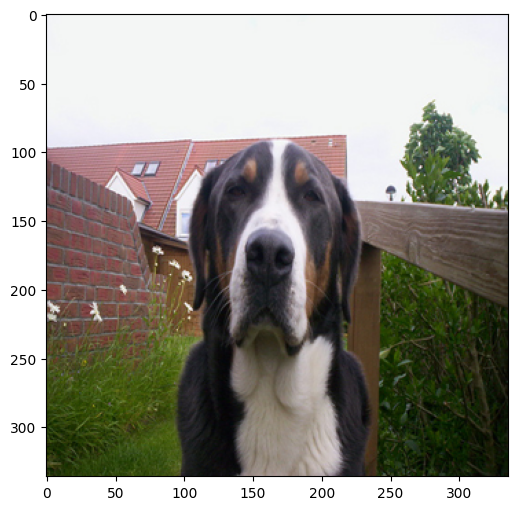

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ensure array is float in [0,1]
heatmap = hp_up
heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-9)

# load original image again (or reuse your earlier variable)
img = np.array(Image.open(image_path).convert("RGB").resize((336,336)))

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.imshow(heatmap, cmap="jet", alpha=0.45)   # adjust alpha as needed
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()
vm.to(device).eval()
print("HF model uses custom vm?", getattr(model, "vision_tower", None) is None or model.vision_tower.vision_model is vm)
# Depending on the HF wrapper, the path may be model.vision_tower or model.model.vision_tower
# Try alternative check:
try:
    uses_vm = model.model.vision_tower.vision_model is vm
    print("model.model.vision_tower uses custom vm?", uses_vm)
except Exception:
    pass
assert hasattr(vm, "last_hidden"), "Please add `self.last_hidden = x` in VisionModel.forward after post_layernorm."

image = Image.open("/Users/vikhyath/CMU/15-783/VLM-Privacy-Protection/data/images/ILSVRC2012_val_00000448.JPEG").convert("RGB")
prompt = """Identify the main object in the image. 
Answer with the object as the first word, with no articles (no "a", "an", "the"). 
Do not describe anything else. 
Just start with lowercase.
Example output: "dog", "bicycle", "person", "tree".
Now respond with only the main object:
"""
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": prompt}
        ]
    }
]
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

# inputs["pixel_values"].requires_grad_(True)
bos_token_id = tokenizer.bos_token_id if tokenizer.bos_token_id is not None else tokenizer.cls_token_id
# decoder_input_ids = torch.tensor([[bos_token_id]])
decoder_input_ids = inputs["input_ids"]
outputs = model(
    **inputs,
    decoder_input_ids=decoder_input_ids,
    return_dict=True,
)

HF model uses custom vm? True
model.model.vision_tower uses custom vm? True


In [5]:
logits = outputs.logits
device = model.device
target_word = "Harp"
target_ids = tokenizer(target_word, add_special_tokens=False).input_ids
target_id = target_ids[0]
pos = logits.shape[1] - 1
# pos = 0
one_hot = torch.zeros_like(logits, device=device)
one_hot[0, pos, target_id] = 1.0
score = torch.sum(logits * one_hot)
# model.zero_grad()
# score.backward(retain_graph=True)
# grad_cam = vm.get_inp_grad()


In [6]:
grad_cam = torch.autograd.grad(outputs=score, inputs=vm.last_hidden, retain_graph=True, create_graph=False)[0]
print(grad_cam.shape)
if grad_cam is None:
    raise RuntimeError("torch.autograd.grad returned None — score does not depend on vm.last_hidden.")
if torch.allclose(grad_cam, torch.zeros_like(grad_cam)):
    print("Warning: grad_cam is all zeros. That means the LM logit may not depend on the vision features for this input/position.")
cam = grad_cam.detach().to(device)
heatmap = vm.relprop(cam, method="transformer_attribution", start_layer=0, alpha=1.0)
print(heatmap.shape)

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

In [6]:
print(grad_cam.shape)
cam = grad_cam.clone().detach()
cam = cam.to(device)

heatmap_patches = vm.relprop(cam, method="transformer_attribution", start_layer=0, alpha=1)
print(heatmap_patches.shape)

torch.Size([1, 577, 1024])


TypeError: 'NoneType' object is not subscriptable

In [14]:
print("model uses custom vm?", model.vision_tower.vision_model is vm)
print("vm has attr last_hidden?", hasattr(vm, "last_hidden_state"))

model uses custom vm? True
vm has attr last_hidden? False


In [27]:
logits = outputs.logits[:, -1, :]        # shape [1, vocab]
probs = torch.softmax(logits, dim=-1)

topk = torch.topk(probs, k=10)
top_ids = topk.indices[0].tolist()
top_probs = topk.values[0].tolist()

for tid, p in zip(top_ids, top_probs):
    print(tid)
    print(f"{tokenizer.decode([tid])}  {p:.4f}")

3536
Har  0.1789
1938
Do  0.1038
349
P  0.0729
323
T  0.0624
383
F  0.0528
319
A  0.0464
7362
Pi  0.0349
6666
Stat  0.0235
1605
Tr  0.0227
22712
Woman  0.0227


In [17]:
logits = outputs.logits[:, -1, :]        # shape [1, vocab]
probs = torch.softmax(logits, dim=-1)

topk = torch.topk(probs, k=10)
top_ids = topk.indices[0].tolist()
top_probs = topk.values[0].tolist()

for tid, p in zip(top_ids, top_probs):
    print(f"{tokenizer.decode([tid])}  {p:.4f}")

T  0.5146
Trump  0.2170
Horn  0.0609
P  0.0438
C  0.0348
Pi  0.0129
Inst  0.0106
Br  0.0083
Tr  0.0073
B  0.0050


In [15]:
logits = outputs.logits[:, -1, :]        # shape [1, vocab]
probs = torch.softmax(logits, dim=-1)

topk = torch.topk(probs, k=10)
top_ids = topk.indices[0].tolist()
top_probs = topk.values[0].tolist()

for tid, p in zip(top_ids, top_probs):
    print(f"{tokenizer.decode([tid])}  {p:.4f}")


Dog  0.9658
Tree  0.0044
A  0.0039
"  0.0035
D  0.0025
St  0.0015
dog  0.0008
Bear  0.0007
Big  0.0007
Brown  0.0006
